# Performance of Hamilton and Russell
How is Mercedes newest driver doing alongside a world champion?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf

In [2]:
%matplotlib inline

In [3]:
cf.go_offline() #allows to use cufflinks offline

In [15]:
race_results_df = pd.read_csv('data/compiled-data/race-results.csv')
race_results_df.head()

,Unnamed: 0,POS,Driver,Car,Laps,Time/Retired,PTS,Race
0,139,1,Charles Leclerc,Ferrari,57,37:33.6,26,BAHRAIN
1,138,2,Carlos Sainz,Ferrari,57,+5.598s,18,BAHRAIN
2,137,3,Lewis Hamilton,Mercedes,57,+9.675s,15,BAHRAIN
3,136,4,George Russell,Mercedes,57,+11.211s,12,BAHRAIN
4,135,5,Kevin Magnussen,Haas Ferrari,57,+14.754s,10,BAHRAIN


In [18]:
# Some results are in capitals for the car column
race_results_df['Car'] = race_results_df['Car'].str.replace('MERCEDES', 'Mercedes')

In [19]:
# let's filter out the results

mercedes_df = race_results_df.loc[race_results_df['Car'] == 'Mercedes']
mercedes_df.head()

,Unnamed: 0,POS,Driver,Car,Laps,Time/Retired,PTS,Race
2,137,3,Lewis Hamilton,Mercedes,57,+9.675s,15,BAHRAIN
3,136,4,George Russell,Mercedes,57,+11.211s,12,BAHRAIN
24,115,5,George Russell,Mercedes,50,+32.732s,10,SAUDI ARABIA
29,110,10,Lewis Hamilton,Mercedes,50,+73.948s,1,SAUDI ARABIA
42,97,3,George Russell,Mercedes,58,+25.593s,15,AUSTRALIA


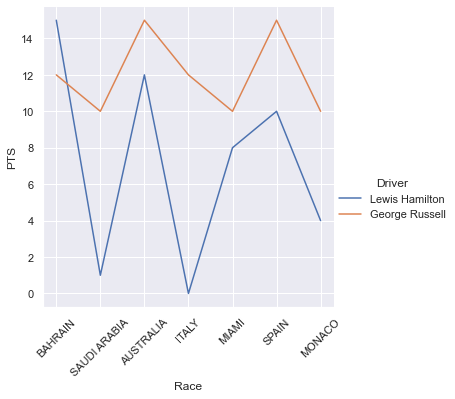

In [44]:
#define figure size
#sns.set(rc={"figure.figsize":(30, 50)}) #width=10, height=7
# create plot
plot = sns.relplot(data=mercedes_df, kind='line', x='Race', y='PTS', hue='Driver', markers=True)
plot.set_xticklabels(rotation=45)

In [50]:
mercedes_df.loc[mercedes_df['Driver'] == 'George Russell']['PTS'].mean()

12.0

In [51]:
mercedes_df.loc[mercedes_df['Driver'] == 'Lewis Hamilton']['PTS'].mean()

7.142857142857143

In [56]:
mercedes_df.loc[mercedes_df['Driver'] == 'George Russell']['POS'].describe()

count     7
unique    3
top       5
freq      3
Name: POS, dtype: object

In [55]:
mercedes_df.loc[mercedes_df['Driver'] == 'Lewis Hamilton']['POS'].describe()

count     7
unique    7
top       3
freq      1
Name: POS, dtype: object